In [1]:
# 크롤링 정책
# robots.txt : 웹페이지의 크롤링 정책 설명한 페이지 ex) www.naver.com/robots.txt, ted.com/robots.txt
# 크롤링법 X : 과도한 크롤링으로 서비스에 영향을 주었을 경우 업무방해 혐의로 고소당할 수 있음
# 법적문제 : 지적재산권, 서비스과부화, 데이터 사용 표준
# API 사용 : 데이터를 가지고 있는 업체에서 데이터를 가져갈 수 있도록 하는 서비스

### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [2]:
import pandas as pd
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [3]:
CLIENT_ID, CLIENT_SECRET = 'DGJwjFI3owlSfbdd88dE', 'xbdKxxpNpE' 

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

In [4]:
# 1. API 문서에서 URL 찾기
ko_txt = '웹크롤링은 재밌습니다.'
url = "https://openapi.naver.com/v1/papago/n2mt"
headers = {
    'Content-Type' : 'application/json',
    'X-Naver-Client-Id' : CLIENT_ID,
    'X-Naver-Client-Secret' : CLIENT_SECRET,
}

params = {'source' : 'ko', 'target' : 'en', 'text' : ko_txt}

In [5]:
json.dumps(params)

'{"source": "ko", "target": "en", "text": "\\uc6f9\\ud06c\\ub864\\ub9c1\\uc740 \\uc7ac\\ubc0c\\uc2b5\\ub2c8\\ub2e4."}'

In [6]:
# 2. request(URL) > response : json(str)
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [7]:
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Web crawling is fun.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"Unknown"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [8]:
# 3. json(str) : en_txt
response.json()

{'message': {'result': {'srcLangType': 'ko',
   'tarLangType': 'en',
   'translatedText': 'Web crawling is fun.',
   'engineType': 'N2MT',
   'pivot': None,
   'dict': None,
   'tarDict': None,
   'modelVer': 'Unknown'},
  '@type': 'response',
  '@service': 'naverservice.nmt.proxy',
  '@version': '1.0.0'}}

In [10]:
en_txt = response.json()['message']['result']['translatedText']
en_txt

'Web crawling is fun.'

In [11]:
# 4. Make Function
def translate(txt, source='ko', target='en'):
    CLIENT_ID, CLIENT_SECRET = 'DGJwjFI3owlSfbdd88dE', 'xbdKxxpNpE'
    
    url = "https://openapi.naver.com/v1/papago/n2mt"
    headers = {
        'Content-Type' : 'application/json',
        'X-Naver-Client-Id' : CLIENT_ID,
        'X-Naver-Client-Secret' : CLIENT_SECRET,
    }

    params = {'source' : source, 'target' : target, 'text' : txt}
    
    response = requests.post(url, json.dumps(params), headers=headers)
    return response.json()['message']['result']['translatedText']

In [12]:
translate('데이터 사이언스는 재밌습니다.')

'Data Science is fun.'

In [14]:
df = pd.DataFrame({
    'id' : list('AB'),
    'title' : ['인공지능 스쿨 화이팅', '데이터 크롤링'],
})

df

,id,title
0,A,인공지능 스쿨 화이팅
1,B,데이터 크롤링


In [17]:
df['en_title'] = df['title'].apply(translate)
df

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


In [19]:
df.to_excel('en_title.xlsx', index=False, encoding='utf-8-sig')

#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [21]:
%whos # %reset 하면 변수 초기화

Variable        Type         Data/Info
--------------------------------------
CLIENT_ID       str          DGJwjFI3owlSfbdd88dE
CLIENT_SECRET   str          xbdKxxpNpE
df              DataFrame      id        title        <...>크롤링         Crawling data
en_txt          str          Web crawling is fun.
headers         dict         n=3
json            module       <module 'json' from 'c:\\<...>\lib\\json\\__init__.py'>
ko_txt          str          웹크롤링은 재밌습니다.
params          dict         n=3
pd              module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
requests        module       <module 'requests' from '<...>\\requests\\__init__.py'>
response        Response     <Response [200]>
translate       function     <function translate at 0x000001D596048048>
url             str          https://openapi.naver.com/v1/papago/n2mt


In [20]:
CLIENT_ID, CLIENT_SECRET = 'DGJwjFI3owlSfbdd88dE', 'xbdKxxpNpE' 

In [22]:
# 1. API 문서 : URL
url = 'https://openapi.naver.com/v1/datalab/search'
params = {
    'startDate' : '2018-01-01',
    'endDate' : '2023-02-16',
    'timeUnit' : 'month',
    'keywordGroups' : [
        {'groupName' : '트위터', 'keywords' : ['트위터', '트윗']},
        {'groupName' : '페이스북', 'keywords' : ['페이스북', '페북']},
        {'groupName' : '인스타그램', 'keywords' : ['트위터', '인스타']},
    ]
}

In [23]:
headers = {
    'Content-Type' : 'application/json',
    'X-Naver-Client-Id' : CLIENT_ID,
    'X-Naver-Client-Secret' : CLIENT_SECRET,
}

In [24]:
# 2. request(URL) > response : json(str)
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [29]:
# 3. json(str) > list, dict > DataFrame
results = response.json()['results']
type(results)

list

In [40]:
# columns : period, ratio, title
dfs = []
for result in results:
    df = pd.DataFrame(result['data'])
    df['title'] = result['title']
    dfs.append(df)

In [41]:
dfs[2]

,period,ratio,title
0,2018-01-01,17.23756,인스타그램
1,2018-02-01,15.56972,인스타그램
2,2018-03-01,15.89367,인스타그램
3,2018-04-01,16.08259,인스타그램
4,2018-05-01,16.29639,인스타그램
...,...,...,...
57,2022-10-01,32.86715,인스타그램
58,2022-11-01,30.52275,인스타그램
59,2022-12-01,30.16556,인스타그램
60,2023-01-01,31.27293,인스타그램


In [43]:
result_df = pd.concat(dfs, ignore_index=True)
result_df

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
181,2022-10-01,32.86715,인스타그램
182,2022-11-01,30.52275,인스타그램
183,2022-12-01,30.16556,인스타그램
184,2023-01-01,31.27293,인스타그램


In [48]:
# column : title(twitter, facebook, instagram) 
# index : period
# value : ratio

pivot_df = result_df.pivot('period', 'title', 'ratio')

In [51]:
# update : 데이터선택 = 수정할데이터
pivot_df.columns = ['instagram', 'twitter', 'facebook']
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-01-01,31.27293,26.64944,14.87866
2023-02-01,16.00833,13.56007,7.00545


In [53]:
import matplotlib.pyplot as plt

In [55]:
%config InlineBackend.figure_formats = {'png', 'retina'} # plot 선명하게

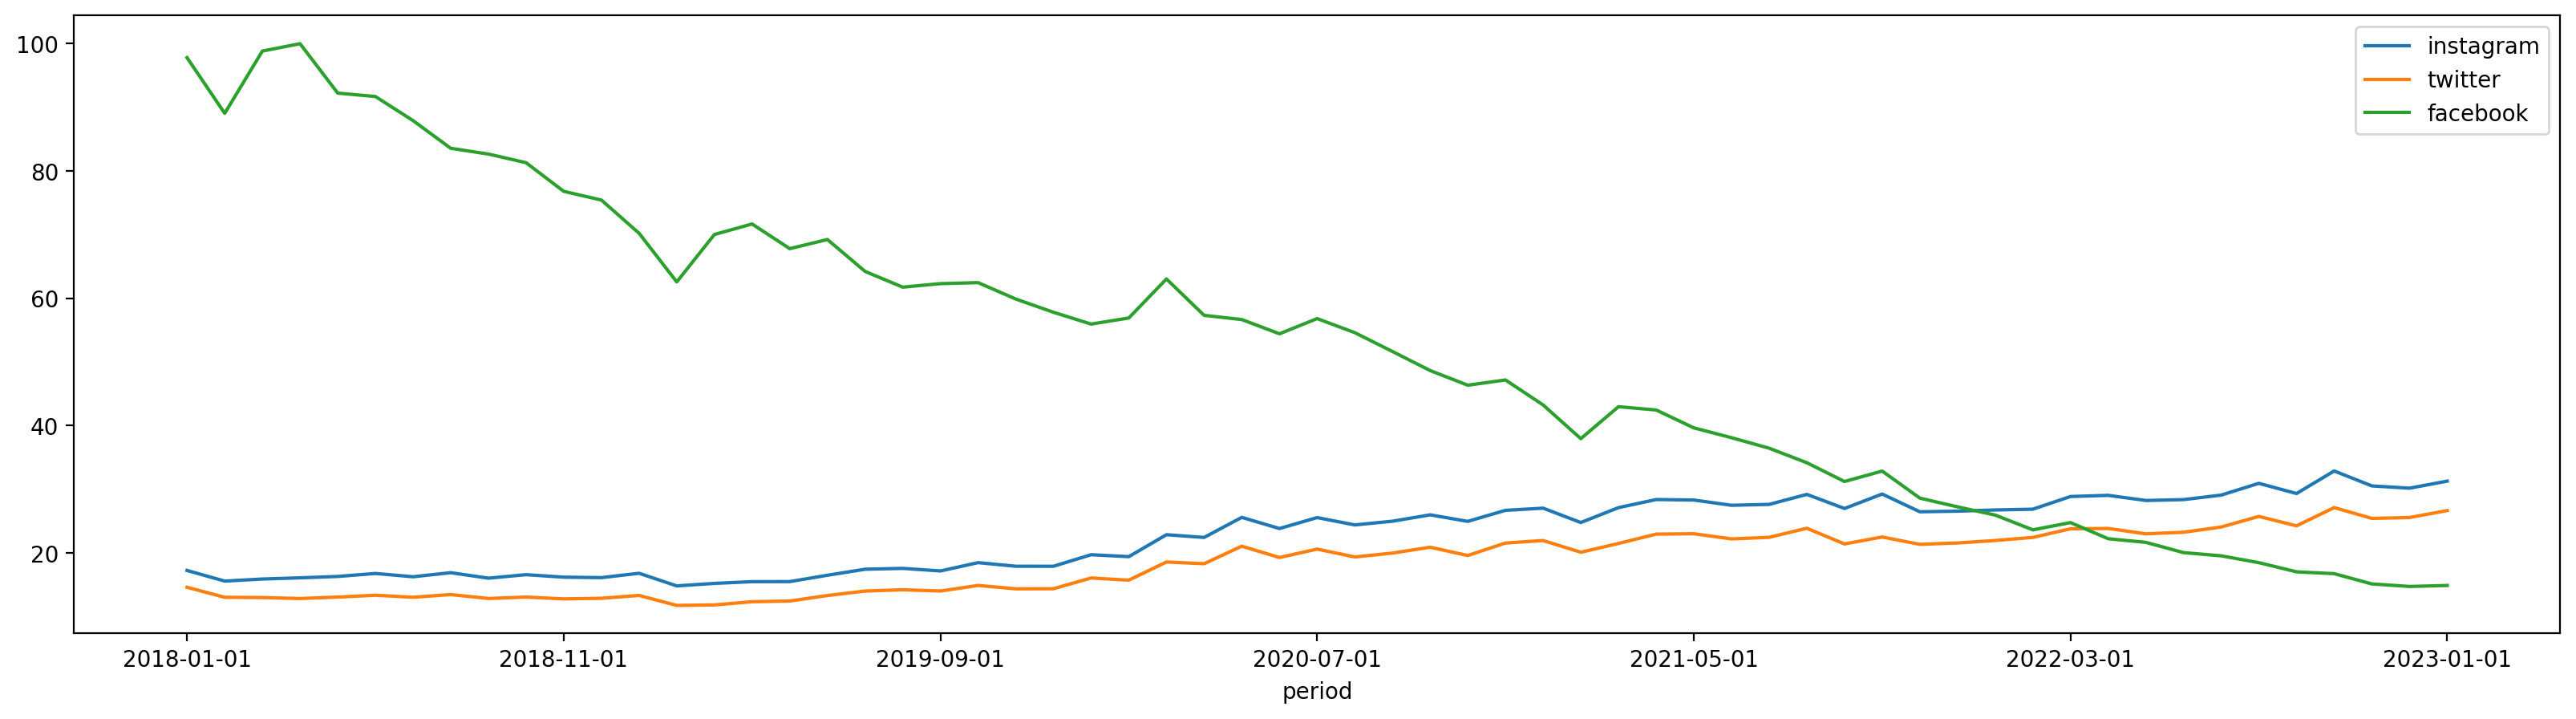

In [56]:
pivot_df[:-1].plot(figsize=(20, 5))
plt.show()